# Análise de Cluster Hierárquico

   Legendas:
   * <code style="color:green">Teoria</code>
   * <code style="color:purple">Dicas</code>
   * <code style="color:red">Prática (exemplo ou exercício)</code>

### <code style="color:green">Cluster Hierárquico </code>
    
    Existem alguns métodos para definir a distância:
   * Vizinho mais próximo
   * Vizinho mais longe
   * Média
   * Centróide
   * Ward
    
    Podemos visualizá-los através do dendograma

Carregando o que será necessário:

In [ ]:
#caso precise fazer instalação, usar
#!pip install tanglegram

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import tanglegram

C:\Users\adria\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\adria\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Importando e trabalhando no conjunto de dados:

In [2]:
# importando o arquivo
alunos_pap = pd.read_csv("dados/alunos_pap.csv", sep=";", decimal=",")
#colocando o nome do aluno como índice
alunos_pap.set_index(alunos_pap.columns[0], inplace=True)
#poderia fazer assim tambem
#alunos_pap.index = alunos_pap["Aluno"]
#alunos_pap = alunos_pap.drop(["Aluno"],axis = 1)
alunos_pap

,Matematica,Portugues
Aluno,,
Dri,9,7
Li,5,4
Bru,6,6
Mi,10,8
Re,4,4
Ze,4,9


Matriz de distâncias:

In [3]:
#calculando matrix de distancias distancia
d = pdist(alunos_pap, metric='euclidean')
d

array([5.        , 3.16227766, 1.41421356, 5.83095189, 5.38516481,
       2.23606798, 6.40312424, 1.        , 5.09901951, 4.47213595,
       2.82842712, 3.60555128, 7.21110255, 6.08276253, 5.        ])

In [4]:
#caso queira ver a matriz mais bonitinha
matriz = squareform(d)
pd.DataFrame(matriz, index=alunos_pap.index, columns= alunos_pap.index)

Aluno,Dri,Li,Bru,Mi,Re,Ze
Aluno,,,,,,
Dri,0.000000,5.000000,3.162278,1.414214,5.830952,5.385165
Li,5.000000,0.000000,2.236068,6.403124,1.000000,5.099020
Bru,3.162278,2.236068,0.000000,4.472136,2.828427,3.605551
Mi,1.414214,6.403124,4.472136,0.000000,7.211103,6.082763
Re,5.830952,1.000000,2.828427,7.211103,0.000000,5.000000
Ze,5.385165,5.099020,3.605551,6.082763,5.000000,0.000000


Criando cluster pelo método hierárquico em suas diferentes formas:

In [5]:
#criando clusters a partir do metodo escolhido
ch_single = linkage(d, method='single')
ch_complete = linkage(d, method='complete')
ch_average = linkage(d, method='average')
ch_centroid = linkage(d, method='centroid')
ch_ward = linkage(d, method='ward')

Vizualizando o dendograma para cada um dos métodos de calculo de distâncias:

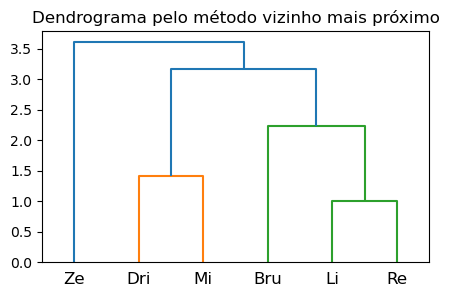

In [6]:
# desenhando dendograma pelo método vizinho mais próximo
plt.figure(figsize=(5, 3))
plt.title("Dendrograma pelo método vizinho mais próximo")
dendrogram(ch_single, labels=alunos_pap.index)
plt.show()

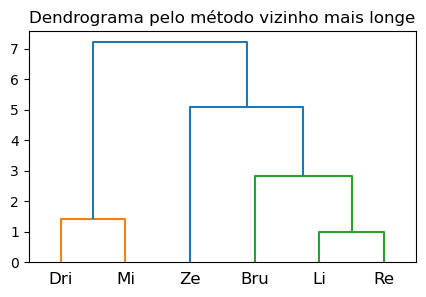

In [7]:
# desenhando dendograma pelo método vizinho mais longe
plt.figure(figsize=(5, 3))
plt.title("Dendrograma pelo método vizinho mais longe")
dendrogram(ch_complete, labels=alunos_pap.index)
plt.show()

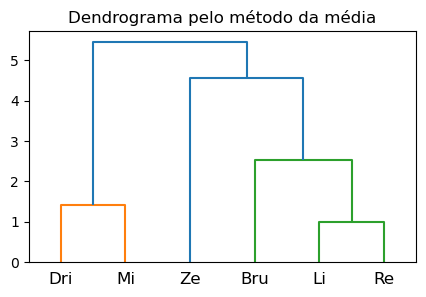

In [8]:
# desenhando dendograma pelo método da média
plt.figure(figsize=(5, 3))
plt.title("Dendrograma pelo método da média")
dendrogram(ch_average, labels=alunos_pap.index)
plt.show()

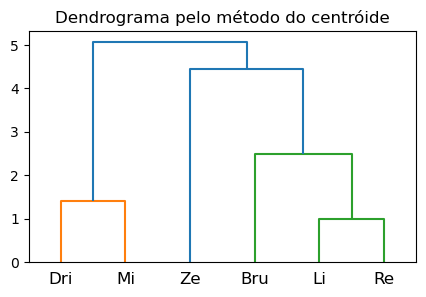

In [9]:
# desenhando dendograma pelo método do centróide
plt.figure(figsize=(5, 3))
plt.title("Dendrograma pelo método do centróide")
dendrogram(ch_centroid, labels=alunos_pap.index)
plt.show()

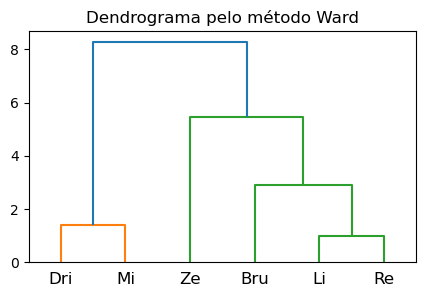

In [10]:
# desenhando dendograma pelo método Ward
plt.figure(figsize=(5, 3))
plt.title("Dendrograma pelo método Ward")
dendrogram(ch_ward, labels=alunos_pap.index)
plt.show()

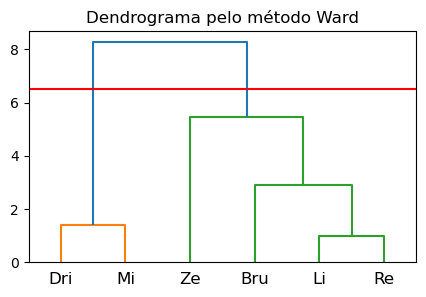

In [11]:
#fazendo cortes no dendograma
plt.figure(figsize=(5, 3))
plt.title("Dendrograma pelo método Ward")
dendrogram(ch_ward, labels=alunos_pap.index)
plt.axhline(y=6.5,color = "red") #você precisa marcar a disância que deseja cortar
plt.show()

### <code style="color:green">Curiosidades </code>
    
    Comparando Dendogramas:
    
    Importante documentar que o pacote tanglegram atualmente não oferece uma maneira direta de adicionar labels customizadas como os dendrogramas padrão fazem. No entanto, uma abordagem alternativa seria plotar os dendrogramas separadamente (as duas opções estão abaixo).

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (tanglegram.tangle)


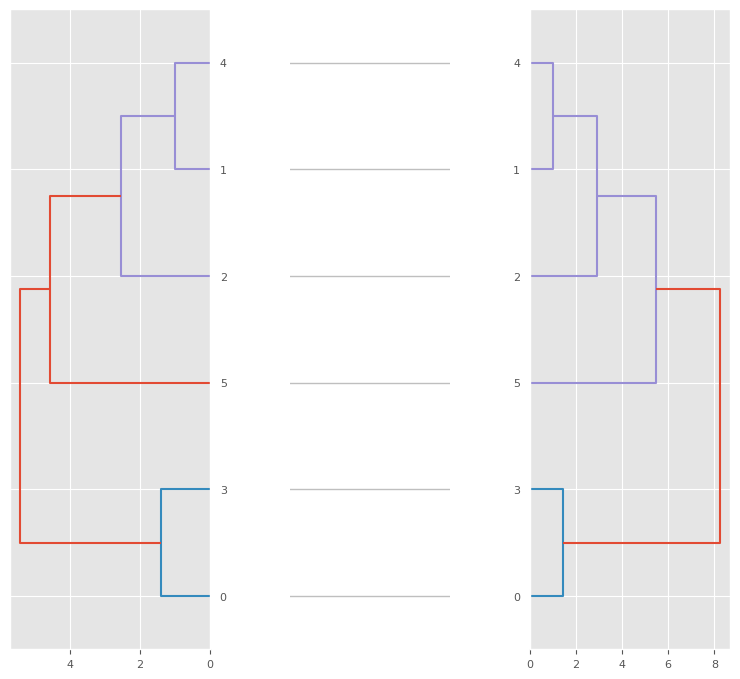

In [12]:
#Comparando o método da média e ward
#Usando a opção pronta, sem label pelo tangleram
tanglegram.plot(ch_average, ch_ward, sort=False) 
plt.show()

In [14]:
#Para saber que numero corresponde a que nome
#Primeiro vamos converter o índice para uma lista
alunos_pap_list = alunos_pap.index.tolist()  
#Criar um DataFrame para mostrar o índice correspondente a cada nome
df_mapping = pd.DataFrame({'Index': range(len(alunos_pap_list)), 'Aluno': alunos_pap_list})
df_mapping
#Com isso você sabe quem é quem no emaranhado acima. Infelizmente o tangleram não aceita labels

,Index,Aluno
0,0,Dri
1,1,Li
2,2,Bru
3,3,Mi
4,4,Re
5,5,Ze


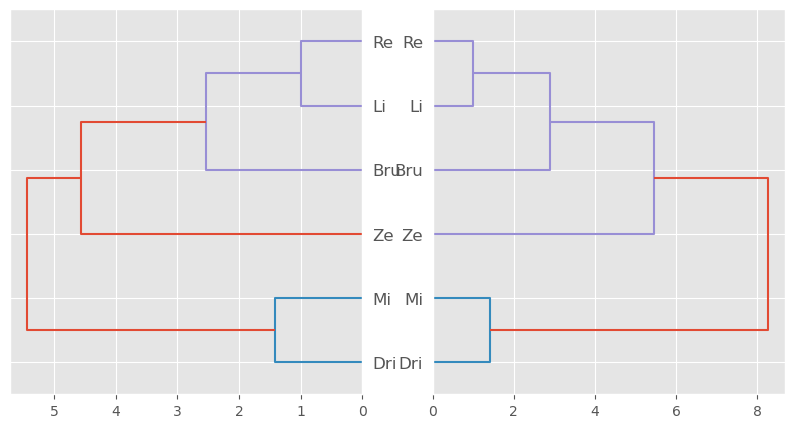

In [15]:
#Uma alternativa é colocar um dendograma ao lado do outro, no entanto perdemos a opção
#do tangleram que compara se mudaram ou não
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
dendrogram(ch_average, labels=alunos_pap.index, ax=axes[0], orientation='left')
dendrogram(ch_ward, labels=alunos_pap.index, ax=axes[1], orientation='right')

plt.show()

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (tanglegram.tangle)


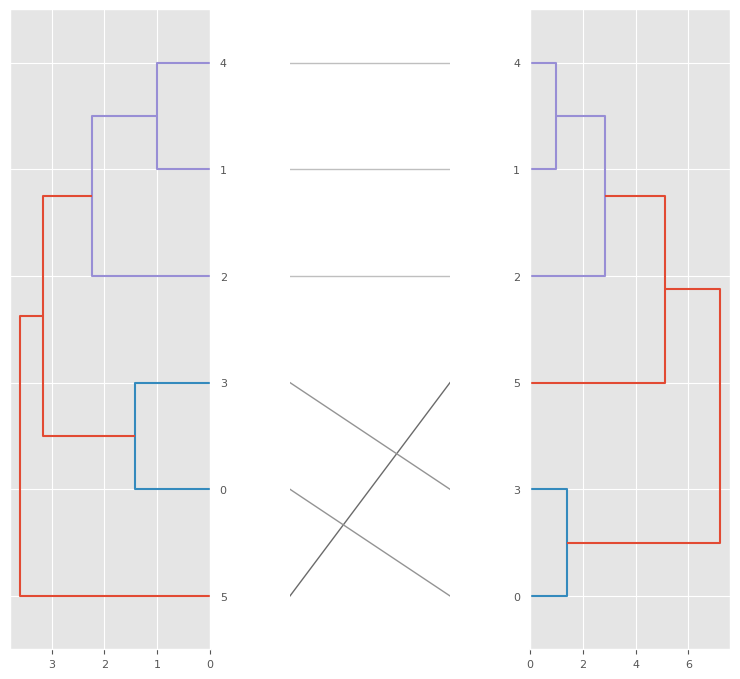

In [16]:
#Comparando o método do vizinho mais próximo e mais longe
#Usando a opção pronta, sem label pelo tangleram
tanglegram.plot(ch_single, ch_complete, sort=False)
plt.show()

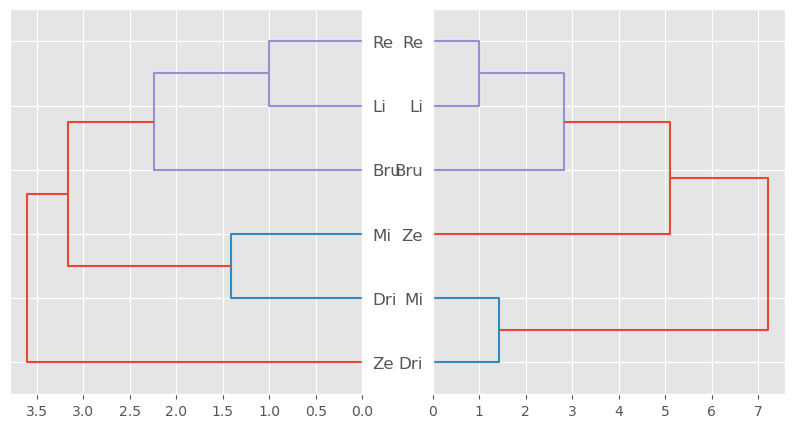

In [19]:
#Uma alternativa é colocar um dendograma ao lado do outro, no entanto perdemos a opção
#do tangleram que compara se mudaram ou não
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
dendrogram(ch_single, labels=alunos_pap.index, ax=axes[0], orientation='left')
dendrogram(ch_complete, labels=alunos_pap.index, ax=axes[1], orientation='right')

plt.show()

### <code style="color:green">Marcando quem pertence a cada grupo </code>
    
    Criando 2 grupos:
    
    Para isso utilizamos a função fcluster com o criterio maxclust, pois ela significa que deve-se criar um agrupamento com t grupos.

In [20]:
# criando dois grupo de alunos
grupos_alunos2 = fcluster(ch_ward, t=2, criterion='maxclust')
# juntando a informação do cluster na base original
alunos_pap['grupo_alunos2'] = grupos_alunos2
alunos_pap

,Matematica,Portugues,grupo_alunos2
Aluno,,,
Dri,9,7,1
Li,5,4,2
Bru,6,6,2
Mi,10,8,1
Re,4,4,2
Ze,4,9,2


Descrevendo os grupos:

In [21]:
# Descrevendo os clusteres (análise descritiva)
mediagrupo_alunos = alunos_pap.groupby('grupo_alunos2').agg(
    n=('Portugues', 'size'),
    Portugues=('Portugues', 'mean'),
    Matematica=('Matematica', 'mean')
)

print(mediagrupo_alunos)

               n  Portugues  Matematica
grupo_alunos2                          
1              2       7.50        9.50
2              4       5.75        4.75
